In [1]:
print('hello world')

hello world


In [2]:
#importing liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#import dataset
df = pd.read_csv('Titanic-Dataset.csv')
y = df.pop("Survived")


In [4]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [47]:
import seaborn as sns



In [7]:
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# get just the mumeric varibales by selecting only the varibales that not 'object ' datatypes
numeric_varibels = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_varibels].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [9]:
df['Age'].fillna(df.Age.mean(), inplace = True)
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


passenger id looks lide worthless 

In [10]:
#import the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score



In [11]:
model = RandomForestRegressor(n_estimators = 100 , oob_score=True, random_state = 42)
model.fit(df[numeric_varibels] , y)

RandomForestRegressor(oob_score=True, random_state=42)

In [12]:
model.oob_score_

0.1361695005913669

In [15]:
y_oob = model.oob_prediction_
print("c-stats"), roc_auc_score(y,y_oob)

c-stats


(None, 0.7399551550399983)

In [22]:
#smaple function to show descriptive stats on catgorical varible
def describe_catagorical(df):
    " just like .describe(), but returns the results for categorical variables only"
    if df.empty or not df.columns.any():
        print("The DataFrame is empty or has no columns.")
    else:
        from IPython.display import display, HTML
        display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))
    

In [23]:
describe_catagorical(df)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [24]:
df.drop (["Name","Ticket","PassengerId"], axis = 1, inplace = True)

In [28]:
def clean_cabin(df):
    try:
        return df[0]
    except TypeError:
        return "None"
    
df["Cabin"]= df.Cabin.apply(clean_cabin)

In [35]:
categorical_variables = ['Sex','Cabin','Embarked']

for variable  in categorical_variables:
    df[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(df[variable], prefix=variable)
    
    df= pd.concat([df, dummies],axis=1)
    df.drop([variable], axis=1, inplace=True)

KeyError: 'Sex'

In [34]:
def printall(df, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(df.to_html(max_rows=max_rows)))
    
printall(df)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,3,26.000000,0,0,7.9250,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
4,3,35.000000,0,0,8.0500,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,1,2,23.4500,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
889,1,26.000000,0,0,30.0000,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False


In [37]:
model = RandomForestRegressor(100, oob_score= True, n_jobs= -1, random_state =42)
model.fit(df, y)
print("C-stats"), roc_auc_score(y,model.oob_prediction_)

C-stats


(None, 0.8635211282608464)

In [38]:
#important featurs

model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

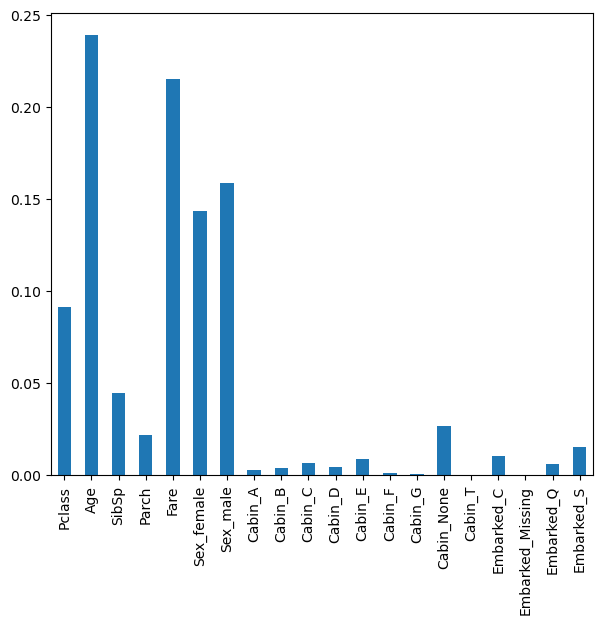

In [45]:
feature_importances = pd.Series(model.feature_importances_, index= df.columns)
feature_importances.sort_values()
feature_importances.plot(kind="bar",figsize=(7,6));

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


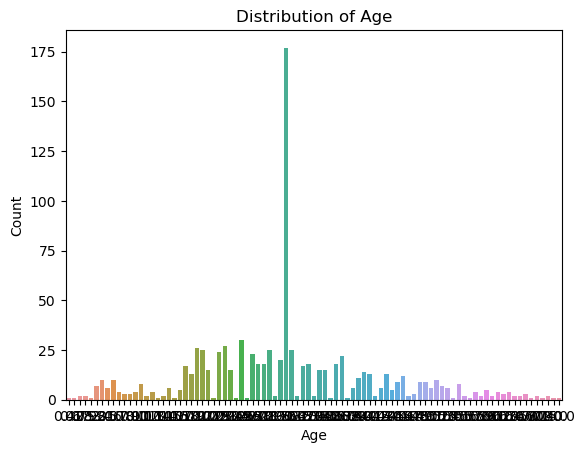

In [53]:
df['Age'] = df['Age'].astype('category')

# Create a count plot
sns.countplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


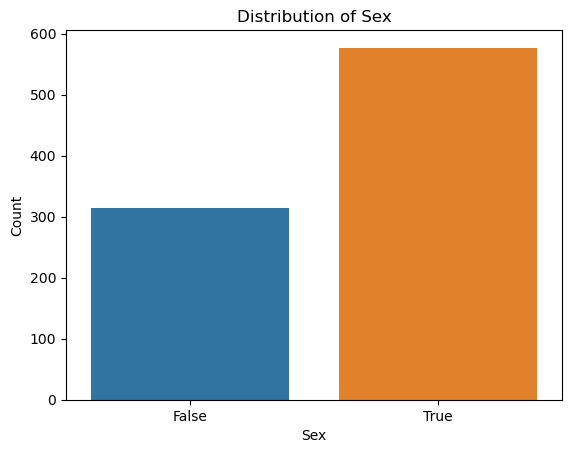

In [58]:
df['Sex_male']= df['Sex_male'].astype('category')

# Create a count plot
sns.countplot(data=df, x='Sex_male')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()
